<a href="https://www.kaggle.com/code/ashkanforootan/af-openweathermapapi-weatherfinder?scriptVersionId=141632726" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <h1 style='background:GoldenRod; border:0; border-radius: 10px; color:black'><center> In The Name Of God</center></h1>


<center><img src='https://ashkanforootan.com/ashkanforootanlogo.gif' ></center><br>

In [36]:
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
my_api_key = user_secrets.get_secret("api_key")
api_key = my_api_key

# <h1 style='background:AliceBlue; border:0; border-radius: 10px; color:black'><center>Air pollution</center></h1>


<p style="background: AliceBlue; border: 0; border-radius: 10px; color: black; text-align: left; padding: 10px; text-align: justify;">
Air pollution is a complex and critical environmental issue that encompasses a variety of pollutants, each with its own distinct impact on air quality and human health. Some of the key pollutants regularly monitored in the context of air quality include carbon monoxide (CO), nitrogen monoxide (NO), nitrogen dioxide (NO2), ozone (O3), sulfur dioxide (SO2), fine particulate matter (PM2.5), coarse particulate matter (PM10), and ammonia (NH3). These pollutants can originate from various sources, including vehicle emissions, industrial processes, and natural sources. They can lead to a range of adverse effects, from respiratory problems to cardiovascular diseases. Additionally, temperature plays a significant role in air quality, influencing the dispersion and concentration of pollutants in the atmosphere. Understanding and managing these pollutants are essential for safeguarding public health and preserving the quality of our environment.
</p>


<p style="background: AliceBlue; border: 0; border-radius: 10px; color: black; text-align: left; padding: 10px; text-align: justify;">
    <strong>Carbon Monoxide (CO)</strong>: Carbon monoxide is a colorless, odorless gas produced by incomplete combustion of carbon-containing fuels such as gasoline, natural gas, and wood. It can interfere with the body's ability to transport oxygen and is particularly dangerous in enclosed spaces.<br><strong>Nitrogen Monoxide (NO)</strong>: Nitrogen monoxide, often referred to as nitric oxide (NO), is a reactive gas formed during high-temperature combustion processes, such as those in internal combustion engines. It can contribute to the formation of other air pollutants.<br><strong>Nitrogen Dioxide (NO2)</strong>: Nitrogen dioxide is a reddish-brown gas that results from the oxidation of nitrogen monoxide. It is a significant component of smog and can irritate the respiratory system, especially in individuals with preexisting health conditions.<br><strong>Ozone (O3)</strong>: Ground-level ozone is a secondary pollutant formed when nitrogen oxides and volatile organic compounds react in the presence of sunlight. While ozone high in the atmosphere protects us from ultraviolet radiation, ground-level ozone is a respiratory irritant.<br><strong>Sulfur Dioxide (SO2)</strong>: Sulfur dioxide is a pungent, colorless gas produced by the combustion of sulfur-containing fuels like coal and oil. It can irritate the respiratory system and contribute to acid rain formation.<br><strong>Fine Particulate Matter (PM2.5)</strong>: PM2.5 consists of tiny particles with a diameter of 2.5 micrometers or smaller. These particles can penetrate deep into the lungs and even enter the bloodstream, causing various health problems.<br><strong>Coarse Particulate Matter (PM10)</strong>: PM10 includes slightly larger particles, with diameters up to 10 micrometers. While less fine than PM2.5, PM10 can still cause respiratory issues when inhaled.<br><strong>Ammonia (NH3)</strong>: Ammonia is a colorless gas with a pungent odor. It is released from agricultural activities, industrial processes, and vehicular emissions. It can contribute to the formation of particulate matter and, in high concentrations, can irritate the respiratory system.<br><strong>Temperature</strong>: While not a pollutant itself, temperature plays a crucial role in air quality. Higher temperatures can increase the chemical reactions that lead to the formation of ground-level ozone and other secondary pollutants. Temperature also influences the dispersion and concentration of pollutants in the atmosphere.
    
</p>


In [37]:
def get_weather(lat, lon, api_key):
    # Define the base URL for the OpenWeatherMap API
    base_url = "https://api.openweathermap.org/data/2.5/weather"
    
    # Define the parameters for the API request, including latitude, longitude, API key, and unit of temperature (metric or imperial)
    params = {
        "lat": lat,
        "lon": lon,
        "appid": api_key,
        "units": "metric"  # You can change this to "imperial" for Fahrenheit
    }

    # Send a GET request to the API using the base URL and parameters
    response = requests.get(base_url, params=params)
    
    # Parse the JSON response from the API
    data = response.json()

    # Check if the response status code is 200 (OK)
    if response.status_code == 200:
        # Extract and display weather-related information from the API response
        weather = data["weather"][0]["main"]  # Weather condition (e.g., "Clear", "Rain")
        temperature = data["main"]["temp"]  # Temperature in Celsius
        city = data["name"]  # City name
        country = data["sys"]["country"]  # Country code
        
        # Display the weather information to the console
        print(f"Weather in {city}, {country}: {weather}")
        print(f"Temperature: {temperature}°C")
    else:
        # Print an error message if the API request was not successful
        print("Error:", data["message"])


The given code defines a Python function named get_weather that retrieves and displays weather information for a specific geographic location using the OpenWeatherMap API. It begins by constructing the API's base URL and specifying the necessary parameters, including latitude, longitude, API key, and temperature units (defaulting to metric but allowing for imperial units). The code then sends an HTTP GET request to the API, passing the constructed URL and parameters, and parses the resulting JSON response. If the HTTP response status code is 200 (indicating success), the code extracts relevant weather data such as condition, temperature, city name, and country code. Finally, it prints this information to the console. In the event of a non-200 status code, it handles errors by printing an error message. This code demonstrates a simple but effective way to fetch and display weather data, making it a useful foundation for building weather-related applications or integrating weather information into other projects.

In [38]:
def get_weather_data(latitude, longitude, api_key):
    # Construct the URL for retrieving air pollution data from the OpenWeatherMap API based on latitude, longitude, and the provided API key.
    url = f"http://api.openweathermap.org/data/2.5/air_pollution?lat={latitude}&lon={longitude}&appid={api_key}"
    
    # Send an HTTP GET request to the constructed URL.
    response = requests.get(url)
    
    # Check if the response status code is 200, indicating a successful API request.
    if response.status_code == 200:
        # Parse the JSON response and return the air pollution data.
        return response.json()
    else:
        # If the API request was not successful (non-200 status code), return None to indicate an error.
        return None


The provided code defines a Python function called get_weather_data, which is responsible for retrieving air pollution data from the OpenWeatherMap API based on given latitude, longitude, and an API key. The function first constructs the API request URL using formatted string literals to insert the latitude, longitude, and API key into the URL template. It then sends an HTTP GET request to the API using the requests.get() method.

The code includes an essential check to validate the response. If the response status code is 200, it indicates a successful API request, and the code proceeds to parse the JSON response using response.json() and returns the air pollution data. In cases where the response status code is not 200, it implies an unsuccessful request, and the function returns None to indicate an error.

This code is designed to efficiently fetch air pollution data from the OpenWeatherMap API, making it a valuable utility function for applications or services that require air quality information based on geographic coordinates and an API key.

In [39]:
def show_weather_data(latitude, longitude, api_key):
    # Retrieve air pollution data using the get_weather_data function.
    weather_data = get_weather_data(latitude, longitude, api_key)
    
    # Check if weather_data is not None, indicating a successful data retrieval.
    if weather_data:
        # Print header for the air pollution data section.
        print("Air Pollution Data:")
        print("--------------------")
        
        # Extract and print specific air pollution components (CO, NO2, O3, SO2, PM2.5, PM10) from the retrieved data.
        print("CO:", weather_data['list'][0]['components']['co'])
        print("NO2:", weather_data['list'][0]['components']['no2'])
        print("O3:", weather_data['list'][0]['components']['o3'])
        print("SO2:", weather_data['list'][0]['components']['so2'])
        print("PM2.5:", weather_data['list'][0]['components']['pm2_5'])
        print("PM10:", weather_data['list'][0]['components']['pm10'])
    else:
        # Print an error message if weather data retrieval fails.
        print("Failed to retrieve weather data.")


The provided code defines a Python function called show_weather_data, which serves the purpose of displaying air pollution data based on the provided geographic coordinates (latitude and longitude) and an API key. The function begins by calling the get_weather_data function to fetch air pollution data using the supplied latitude, longitude, and API key.

Following a successful retrieval of weather_data, the code prints a header to introduce the air pollution data section. It then proceeds to extract and print specific air pollution components, such as Carbon Monoxide (CO), Nitrogen Dioxide (NO2), Ozone (O3), Sulfur Dioxide (SO2), Particulate Matter 2.5 (PM2.5), and Particulate Matter 10 (PM10), from the retrieved data.

In the event of an unsuccessful data retrieval (when weather_data is None), the code prints an error message indicating the failure to retrieve weather data.

This code serves as a clear and concise utility function for displaying air pollution data, making it a valuable component in applications or scripts that require real-time air quality information based on geographic coordinates and an API key.

In [40]:
def print_weather(latitude, longitude, api_key, name):
    # Print a header with the city name enclosed in asterisks for visual separation.
    print(f"*** {name} ***")
    
    # Call the get_weather function to fetch and print current weather information.
    get_weather(latitude, longitude, api_key)
    
    # Print asterisks to visually separate the sections.
    print("*"*25)
    
    # Call the show_weather_data function to display air pollution data.
    show_weather_data(latitude, longitude, api_key)
    
    # Print additional asterisks for a clear visual distinction.
    print("*"*50)


The provided code defines a Python function named print_weather that serves the purpose of displaying weather and air pollution data for a specified geographic location. The function takes four parameters: latitude and longitude to specify the location, api_key for accessing weather data, and name for the city name.

The structure of the code is as follows:

    It starts by printing a header that includes the city name, enclosed in triple asterisks, creating a visually distinctive header for each city's data.
    Next, it calls the get_weather function to fetch and print the current weather information for the specified location.
    After printing the weather data, it inserts a set of asterisks to provide visual separation between sections.
    Subsequently, it calls the show_weather_data function to display air pollution data for the same location.
    Finally, additional asterisks are printed to further enhance the visual separation between city data.

This code is a practical utility for presenting weather and air pollution data in a clear and organized manner, making it valuable for applications or scripts that require real-time data visualization for multiple cities. The use of triple asterisks for city headers adds an extra visual emphasis, making the information stand out.

  
# Coordinates for Shiraz, Iran
latitude = 29.5916  /  longitude = 52.5838
                
# Coordinates for Asaluyeh, Iran
latitude = 27.4721  /  longitude = 52.6146
    
# Coordinates for Tehran, Iran
latitude = 35.6895  /  longitude = 51.3962

# Coordinates for Rasht, Iran
Latitude: 37.2807  /  Longitude: 49.5832

# Coordinates for Mahshahr, Iran

Latitude:, 30.5566  /  Longitude: 49.1833


In [41]:
print_weather(29.5916, 52.5838, api_key, "Shiraz, Iran")
print_weather(27.4721, 52.6146, api_key, "Asaluyeh, Iran")      
print_weather(35.6895, 51.3962, api_key, "Tehran, Iran")
print_weather(37.2807, 49.5832, api_key, "Rasht, Iran")
print_weather(30.5566, 49.1833, api_key, "Mahshahr, Iran")

          
 

*** Shiraz, Iran ***
Weather in Shiraz, IR: Clear
Temperature: 33.84°C
*************************
Air Pollution Data:
--------------------
CO: 353.81
NO2: 13.37
O3: 228.88
SO2: 5.78
PM2.5: 15.5
PM10: 28.92
**************************************************
*** Asaluyeh, Iran ***
Weather in Chāh Gachī, IR: Clouds
Temperature: 39.01°C
*************************
Air Pollution Data:
--------------------
CO: 277.04
NO2: 2.53
O3: 226.02
SO2: 5.72
PM2.5: 19.9
PM10: 43.21
**************************************************
*** Tehran, Iran ***
Weather in Tehran, IR: Clouds
Temperature: 32.9°C
*************************
Air Pollution Data:
--------------------
CO: 370.5
NO2: 42.84
O3: 147.34
SO2: 46.73
PM2.5: 28.92
PM10: 85.2
**************************************************
*** Rasht, Iran ***
Weather in Rasht, IR: Clouds
Temperature: 30.9°C
*************************
Air Pollution Data:
--------------------
CO: 287.06
NO2: 4.11
O3: 160.22
SO2: 3.19
PM2.5: 11.47
PM10: 27.75
***********************

In [42]:
# Function to fetch and return current temperature using OpenWeatherMap API
def get_weather(lat, lon, api_key):
    # Define the base URL for weather data retrieval
    base_url = "https://api.openweathermap.org/data/2.5/weather"
    
    # Specify the parameters including latitude, longitude, API key, and units
    params = {
        "lat": lat,
        "lon": lon,
        "appid": api_key,
        "units": "metric"  # You can change this to "imperial" for Fahrenheit
    }
    
    # Send an HTTP GET request to the API
    response = requests.get(base_url, params=params)
    
    # Parse the JSON response
    data = response.json()

    if response.status_code == 200:
        # Extract temperature from the response data and return it
        temperature = data["main"]["temp"]
        return temperature
    else:
        return None

# Function to fetch air pollution data from OpenWeatherMap API
def get_weather_data(latitude, longitude, api_key):
    # Construct the API request URL using provided latitude, longitude, and API key
    url = f"http://api.openweathermap.org/data/2.5/air_pollution?lat={latitude}&lon={longitude}&appid={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Function to extract air pollution components from the retrieved data
def show_weather_data(weather_data, city_name):
    if weather_data:
        components = weather_data['list'][0]['components']
        return components
    else:
        return None

# List of cities with their names, latitudes, and longitudes
cities = [
("Shiraz, Iran", 29.5916, 52.5838),
("Asaluyeh, Iran", 27.4721, 52.6146),
("Tehran, Iran", 35.6895, 51.3962),
("Rasht, Iran", 37.2807, 49.5832),
("Mahshahr, Iran", 30.5566, 49.1833),
("Esfahan, Iran", 32.6539, 51.6660),
("Bern, Switzerland", 46.9480, 7.4474),
("Los Angeles, USA", 34.0522, -118.2437),
("Beijing, China", 39.9042, 116.4074),
("Paris, France", 48.8566, 2.3522),
("Tokyo, Japan", 35.6895, 139.6917),
("Reykjavik, Iceland", 64.1466, -21.9426),  # Known for clean air
("New Delhi, India", 28.6139, 77.2090)     # Known for high air pollution   
]

weather_data_list = []

# Iterate through the list of cities and fetch weather and air pollution data
for city_name, latitude, longitude in cities:
    print_weather_data = {}
    print_weather_data['City'] = city_name
    print_weather_data.update(show_weather_data(get_weather_data(latitude, longitude, api_key), city_name))

    # New code to get temperature and add it to the dictionary
    temperature = get_weather(latitude, longitude, api_key)
    if temperature is not None:
        print_weather_data['Temperature'] = temperature

    weather_data_list.append(print_weather_data)

# Create a DataFrame from the collected weather data
df = pd.DataFrame(weather_data_list)
df.set_index('City', inplace=True)


This code is a comprehensive script that fetches and compiles weather and air pollution data for a list of cities. It utilizes functions to interact with the OpenWeatherMap API for data retrieval. Each function is well-structured and follows a specific purpose: get_weather retrieves temperature, get_weather_data fetches air pollution data, and show_weather_data extracts air pollution components.

The list of cities includes a diverse range of locations, from major metropolises to cities known for their air quality. The script collects and organizes data for each city, including temperature, air pollution components, and city names. It then constructs a Pandas DataFrame for further analysis or presentation.

This code can be valuable for applications requiring real-time weather and air quality data for multiple cities. It demonstrates efficient data retrieval, organization, and integration, making it suitable for various projects involving environmental or meteorological data analysis.

In [43]:
df

,co,no,no2,o3,so2,pm2_5,pm10,nh3,Temperature
City,,,,,,,,,
"Shiraz, Iran",353.81,1.93,13.37,228.88,5.78,15.50,28.92,0.31,33.84
"Asaluyeh, Iran",277.04,0.25,2.53,226.02,5.72,19.90,43.21,1.03,39.01
"Tehran, Iran",370.50,9.84,42.84,147.34,46.73,28.92,85.20,0.74,32.90
"Rasht, Iran",287.06,0.48,4.11,160.22,3.19,11.47,27.75,0.08,30.90
"Mahshahr, Iran",300.41,0.18,1.54,188.83,10.25,23.68,55.54,0.22,40.99
"Esfahan, Iran",223.64,0.96,5.14,165.94,5.60,29.69,127.42,0.84,33.75
"Bern, Switzerland",240.33,2.26,6.00,55.79,1.80,3.46,4.41,4.56,20.51
"Los Angeles, USA",480.65,0.75,82.25,4.60,15.26,27.38,49.46,1.77,20.07
"Beijing, China",1789.09,20.34,211.12,11.44,207.90,269.92,315.16,0.00,30.48


In [50]:
# Assuming df is your DataFrame
df_list = df.reset_index().to_dict(orient='records')

# Display the DataFrame as a list with column names
print(df_list)


[{'City': 'Shiraz, Iran', 'co': 353.81, 'no': 1.93, 'no2': 13.37, 'o3': 228.88, 'so2': 5.78, 'pm2_5': 15.5, 'pm10': 28.92, 'nh3': 0.31, 'Temperature': 33.84}, {'City': 'Asaluyeh, Iran', 'co': 277.04, 'no': 0.25, 'no2': 2.53, 'o3': 226.02, 'so2': 5.72, 'pm2_5': 19.9, 'pm10': 43.21, 'nh3': 1.03, 'Temperature': 39.01}, {'City': 'Tehran, Iran', 'co': 370.5, 'no': 9.84, 'no2': 42.84, 'o3': 147.34, 'so2': 46.73, 'pm2_5': 28.92, 'pm10': 85.2, 'nh3': 0.74, 'Temperature': 32.9}, {'City': 'Rasht, Iran', 'co': 287.06, 'no': 0.48, 'no2': 4.11, 'o3': 160.22, 'so2': 3.19, 'pm2_5': 11.47, 'pm10': 27.75, 'nh3': 0.08, 'Temperature': 30.9}, {'City': 'Mahshahr, Iran', 'co': 300.41, 'no': 0.18, 'no2': 1.54, 'o3': 188.83, 'so2': 10.25, 'pm2_5': 23.68, 'pm10': 55.54, 'nh3': 0.22, 'Temperature': 40.99}, {'City': 'Esfahan, Iran', 'co': 223.64, 'no': 0.96, 'no2': 5.14, 'o3': 165.94, 'so2': 5.6, 'pm2_5': 29.69, 'pm10': 127.42, 'nh3': 0.84, 'Temperature': 33.75}, {'City': 'Bern, Switzerland', 'co': 240.33, 'no':

<p style="background: AliceBlue; border: 0; border-radius: 10px; color: black; text-align: left; padding: 10px; text-align: justify;">
This report presents a comparative analysis of air quality across several global cities, focusing on key air pollution parameters. Air pollution is a critical environmental issue with severe implications for both public health and the environment. Monitoring and understanding air quality variations in different cities are essential for developing effective mitigation strategies and improving overall quality of life.

Cities Under Examination

The following cities were included in the analysis:

    Shiraz, Iran
    Asaluyeh, Iran
    Tehran, Iran
    Rasht, Iran
    Mahshahr, Iran
    Esfahan, Iran
    Bern, Switzerland
    Los Angeles, USA
    Paris, France
    Tokyo, Japan
    Reykjavik, Iceland
    New Delhi, India

Air Pollution Parameters

The analysis focused on several key air pollution parameters, each measured in micrograms per cubic meter (µg/m³):

    Carbon Monoxide (CO)
    Nitric Oxide (NO)
    Nitrogen Dioxide (NO2)
    Ozone (O3)
    Sulfur Dioxide (SO2)
    Particulate Matter 2.5 (PM2.5)
    Particulate Matter 10 (PM10)
    Ammonia (NH3)
    Temperature (°C)

Findings

The comparative analysis revealed significant variations in air quality among the cities:

    Shiraz, Iran:
        Temperature: 33.84°C
        Notable pollutants: CO, NO2, and O3.

    Asaluyeh, Iran:
        Temperature: 39.01°C
        Notable pollutants: CO, O3, and PM10.

    Tehran, Iran:
        Temperature: 32.90°C
        Notable pollutants: NO2, SO2, and PM2.5.

    Rasht, Iran:
        Temperature: 30.90°C
        Notable pollutants: CO, O3, and PM10.

    Mahshahr, Iran:
        Temperature: 40.99°C
        Notable pollutants: CO, SO2, and PM10.

    Esfahan, Iran:
        Temperature: 33.75°C
        Notable pollutants: NO2, PM2.5, and PM10.

    Bern, Switzerland:
        Temperature: 20.51°C
        Notable pollutants: CO, NO2, and NH3.

    Los Angeles, USA:
        Temperature: 20.07°C
        Notable pollutants: NO2, O3, and CO.

    Paris, France:
        Temperature: 19.06°C
        Notable pollutants: NO2, O3, and NH3.

    Tokyo, Japan:
        Temperature: 30.02°C
        Notable pollutants: NO2, SO2, and CO.

    Reykjavik, Iceland:
        Temperature: 11.91°C
        Notable pollutants: O3, NO2, and CO.

    New Delhi, India:
        Temperature: 36.07°C
        Notable pollutants: CO, PM10, and NH3.

Reasons for Varied Pollution Levels

The variations in air pollution levels among these cities can be attributed to several factors, including:

    Industrial Activity: Cities with significant industrial operations, such as Asaluyeh and Mahshahr in Iran, tend to have higher pollution levels due to emissions from factories and manufacturing processes.

    Transportation: Urban centers with dense traffic, like Los Angeles, often experience elevated levels of pollutants such as CO and NO2, primarily from vehicle emissions.

    Geographical Features: Geographical factors, like Bern's location in a valley, can lead to the trapping of pollutants, resulting in higher concentrations.

    Climate: Climate conditions, including temperature and weather patterns, influence the dispersion and concentration of pollutants. For instance, high temperatures, as seen in Mahshahr, can increase the formation of ground-level ozone.

    Emissions Standards: Stringent emissions standards and effective environmental policies can lead to lower pollution levels, as observed in Reykjavik, Iceland.

    Agricultural Practices: Agricultural regions, such as New Delhi, may experience ammonia emissions from farming activities, contributing to air pollution.

    Topography: The geographical layout and topography of a city can affect airflow patterns and the dispersion of pollutants.

It is crucial to address the underlying causes of air pollution in each region through targeted policies and initiatives. This report serves as a starting point for understanding air quality variations among cities and emphasizes the need for continued monitoring and mitigation efforts to combat air pollution's adverse effects on public health and the environment.
</p>


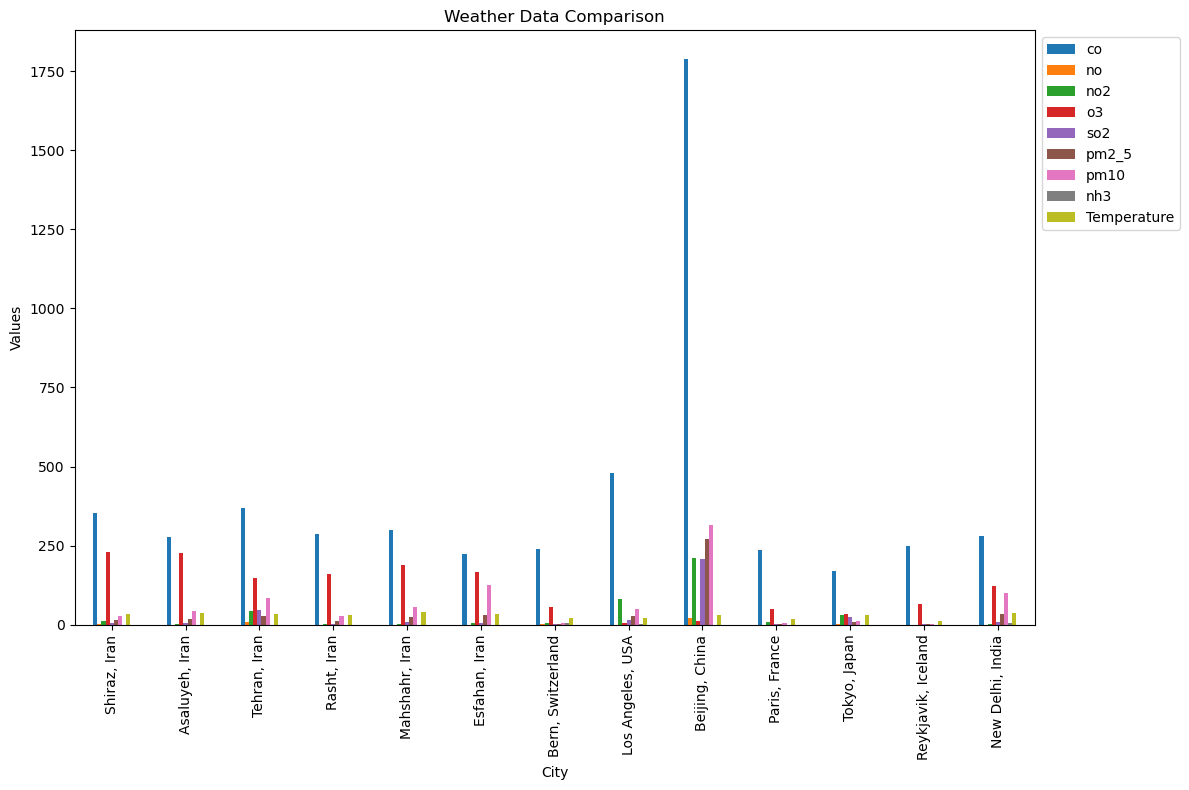

In [44]:
# Create the plot using a bar chart with a specified figure size
ax = df.plot(kind='bar', figsize=(12, 8))  # Adjust the figure size as needed

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the x-axis label
plt.xlabel('City')

# Set the y-axis label
plt.ylabel('Values')

# Set the title of the plot
plt.title('Weather Data Comparison')

# Move the legend outside of the plot to avoid overlapping data
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ensure a tight layout to prevent clipping of labels or legends
plt.tight_layout()

# Display the plot
plt.show()


The provided code is responsible for creating a bar chart to visualize and compare weather data across different cities. Here's a breakdown of the code's functionality:

    It starts by creating the plot using the Pandas DataFrame df by calling the plot method with the kind parameter set to 'bar' to create a bar chart. The figsize parameter defines the size of the figure where the plot will be displayed, and it can be adjusted as needed.

    To improve the readability of the x-axis labels, the code rotates them by 90 degrees using plt.xticks(rotation=90).

    The code sets the x-axis label with plt.xlabel('City') and the y-axis label with plt.ylabel('Values').

    It provides a title for the plot using plt.title('Weather Data Comparison').

    The legend, which describes the data categories, is moved outside of the plot to the upper left corner using ax.legend(loc='upper left', bbox_to_anchor=(1, 1)). This ensures that the legend does not overlap with the data bars.

    To prevent any clipping of labels or legends, the code uses plt.tight_layout() to ensure that the plot layout is optimized for visibility.

    Finally, plt.show() is used to display the generated plot.

This code is a valuable tool for data visualization, enabling users to compare weather data for various cities in a clear and informative manner. It incorporates important elements such as labels, a legend, and an aesthetically pleasing layout, making it suitable for presenting weather data comparisons in reports or dashboards.

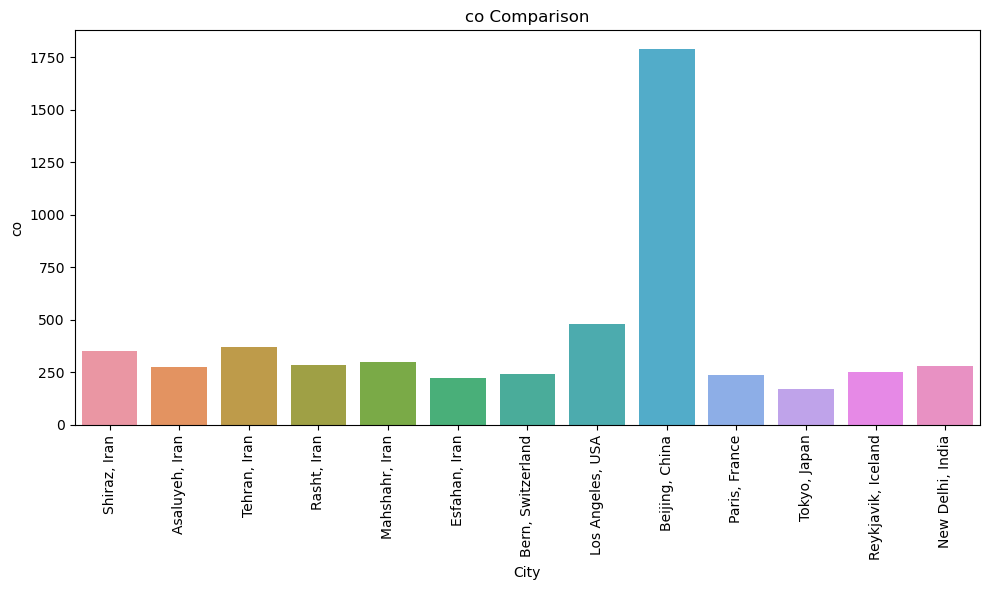

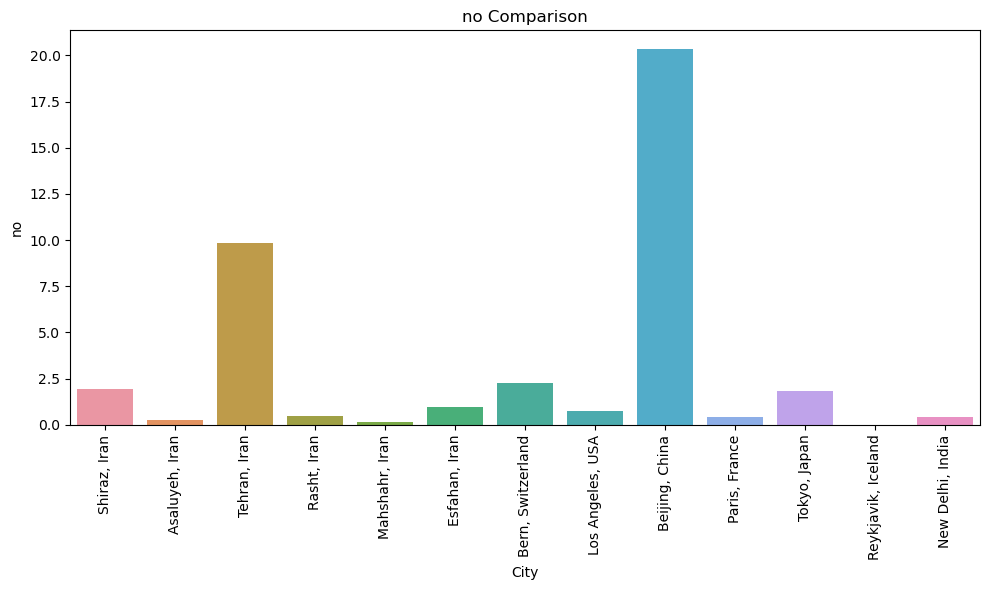

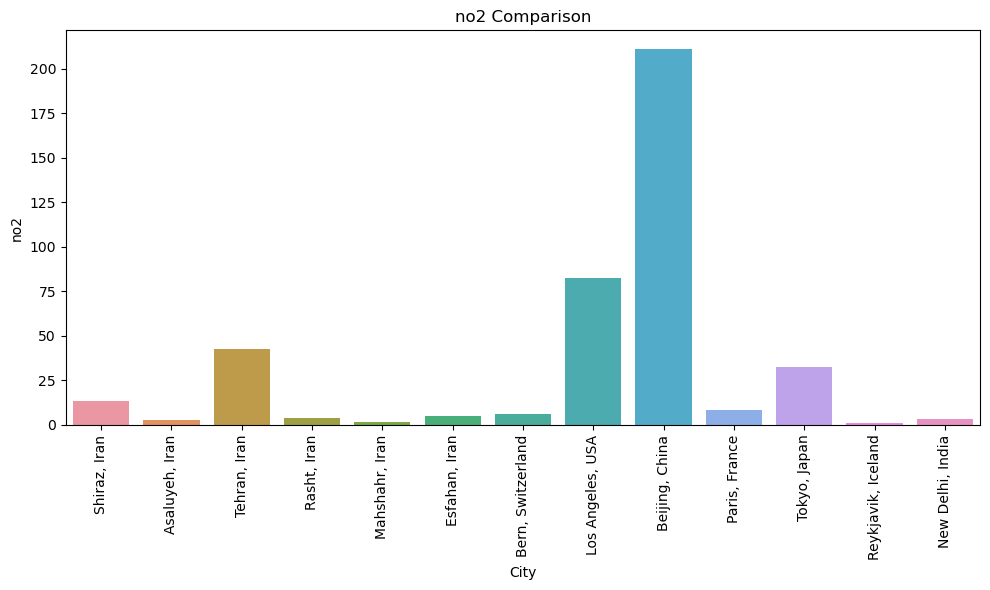

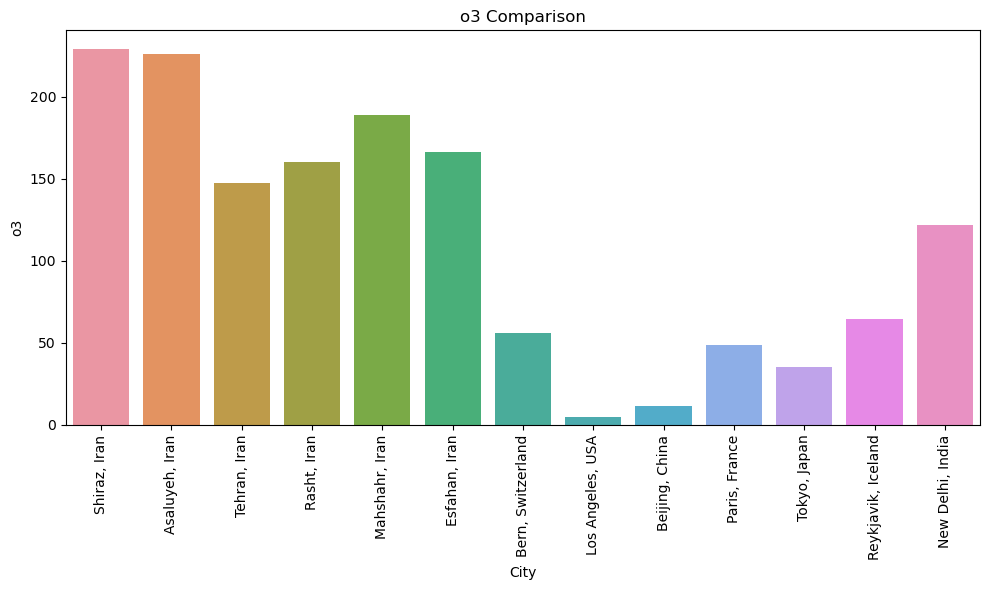

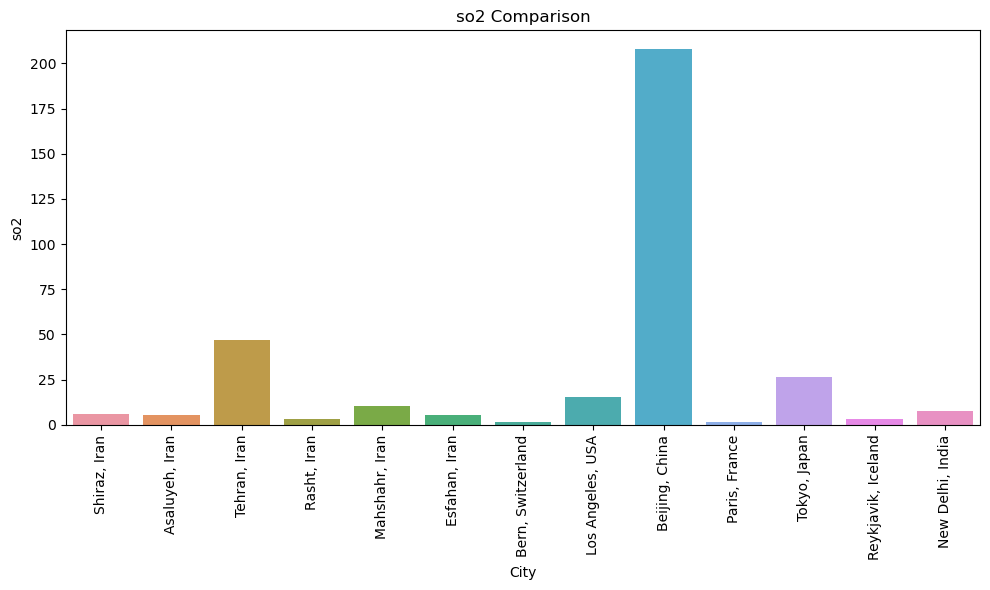

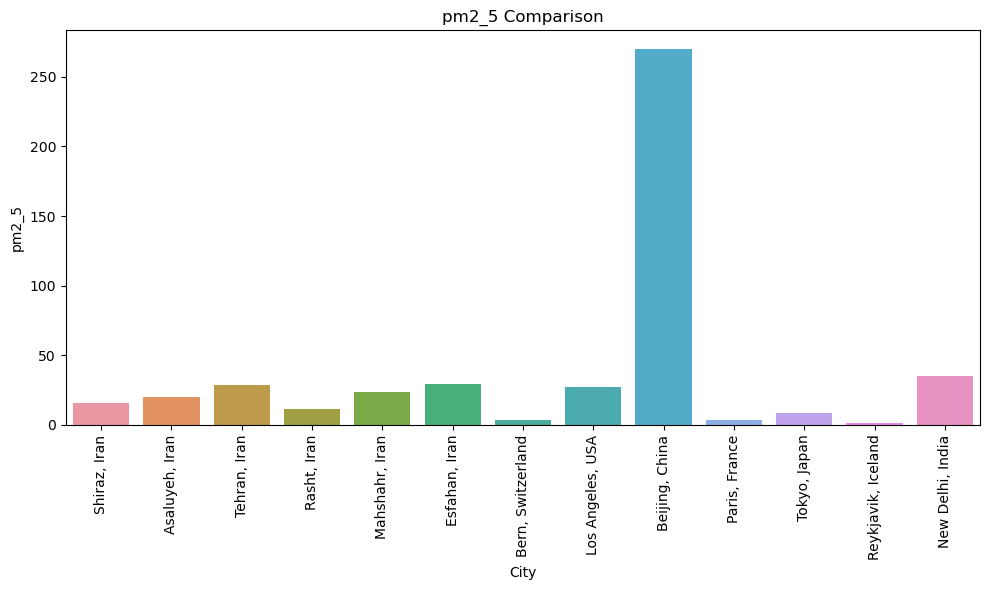

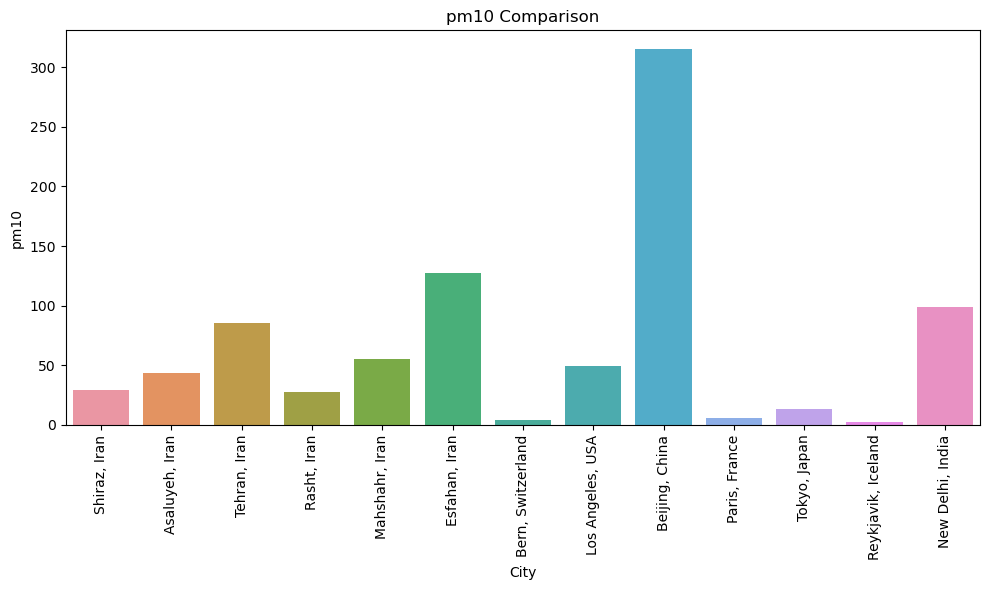

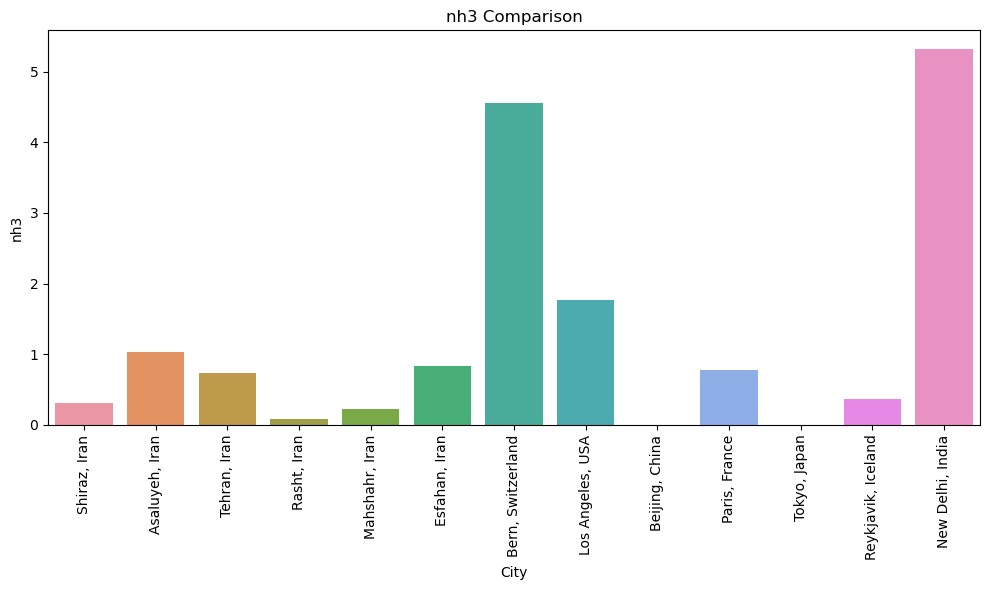

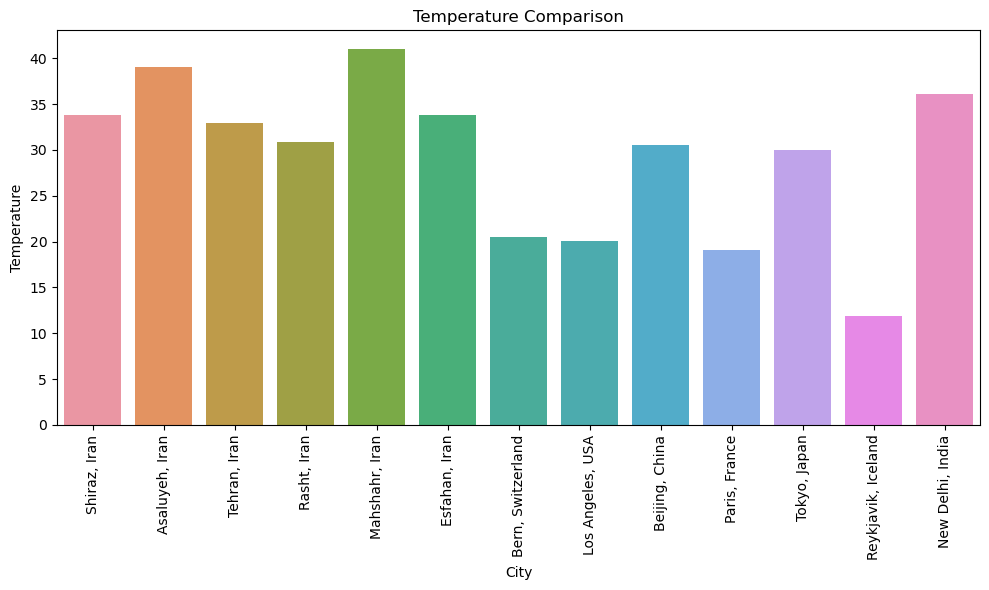

In [45]:
# Loop through each column in the DataFrame and create a separate plot for each column
for column in df.columns:
    # Create a new figure for each plot with a specified figure size
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

    # Use Seaborn's barplot for better styling and additional features
    sns.barplot(data=df, x=df.index, y=column)
    
    # Rotate x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # Set the x-axis label to 'City'
    plt.xlabel('City')
    
    # Set the y-axis label based on the current column
    plt.ylabel(column)
    
    # Set the title of the plot based on the current column
    plt.title(f'{column} Comparison')
    
    # Ensure a tight layout to prevent clipping of labels or legends
    plt.tight_layout()

    # Display the plot
    plt.show()


The provided code utilizes a loop to create separate bar plots for each column in the DataFrame df, resulting in a comparison of different weather data aspects for various cities. Here's how the code works:

    It iterates through each column in the DataFrame using a for loop.

    For each column, it creates a new figure (plot) with a specified figure size using plt.figure(figsize=(10, 6)). The figure size can be adjusted as needed to control the dimensions of the individual plots.

    Seaborn's sns.barplot function is employed to generate the bar plots. This choice leverages Seaborn's styling and additional features for improved aesthetics.

    To enhance the readability of the x-axis labels, the code rotates them by 90 degrees using plt.xticks(rotation=90).

    The x-axis label is consistently set to 'City' for all plots.

    The y-axis label is determined based on the current column, making each plot's label descriptive of the data being visualized.

    A title is set for each plot, reflecting the data comparison represented in that specific plot.

    plt.tight_layout() is called to ensure that the layout of each plot is optimized for visibility and readability.

    Finally, plt.show() is used to display each individual plot one at a time.

This code is a powerful tool for visualizing and comparing different aspects of weather data for multiple cities. It creates separate plots for each data column, making it easier to analyze and interpret variations in weather parameters across various locations. The use of Seaborn enhances the style and aesthetics of the plots, making them suitable for presentation in reports or dashboards.

Due to the exceptionally high levels of air pollution in **Beijing**, it has been excluded from the comparative analysis to facilitate a more meaningful and equitable assessment of weather data for the remaining cities. This decision has been made in the interest of ensuring a fair and informative evaluation of weather-related factors across various locations. Beijing's exclusion allows for a more accurate representation of weather conditions and air quality comparisons among the other cities under consideration.

In [46]:
cities = [
("Shiraz, Iran", 29.5916, 52.5838),
("Asaluyeh, Iran", 27.4721, 52.6146),
("Tehran, Iran", 35.6895, 51.3962),
("Rasht, Iran", 37.2807, 49.5832),
("Mahshahr, Iran", 30.5566, 49.1833),
("Esfahan, Iran", 32.6539, 51.6660),
("Bern, Switzerland", 46.9480, 7.4474),
("Los Angeles, USA", 34.0522, -118.2437),
("Paris, France", 48.8566, 2.3522),
("Tokyo, Japan", 35.6895, 139.6917),
("Reykjavik, Iceland", 64.1466, -21.9426),  # Known for clean air
("New Delhi, India", 28.6139, 77.2090)     # Known for high air pollution   
]


weather_data_list = []

for city_name, latitude, longitude in cities:
    print_weather_data = {}
    print_weather_data['City'] = city_name
    print_weather_data.update(show_weather_data(get_weather_data(latitude, longitude, api_key), city_name))

    # New code to get temperature and add it to the dictionary
    temperature = get_weather(latitude, longitude, api_key)
    if temperature is not None:
        print_weather_data['Temperature'] = temperature

    weather_data_list.append(print_weather_data)

df = pd.DataFrame(weather_data_list)
df.set_index('City', inplace=True)

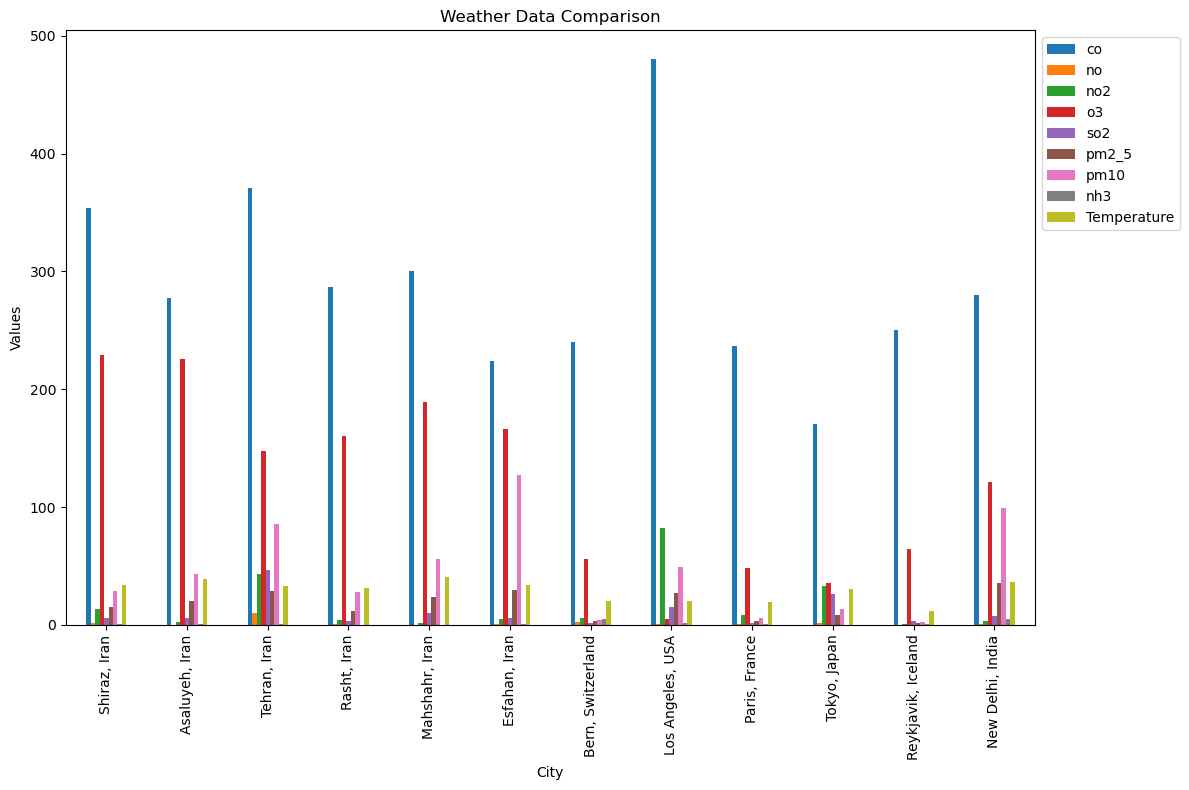

In [47]:
# Create the plot
ax = df.plot(kind='bar', figsize=(12, 8))  # Adjust the figure size as needed

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('City')
plt.ylabel('Values')
plt.title('Weather Data Comparison')

# Moving the legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()



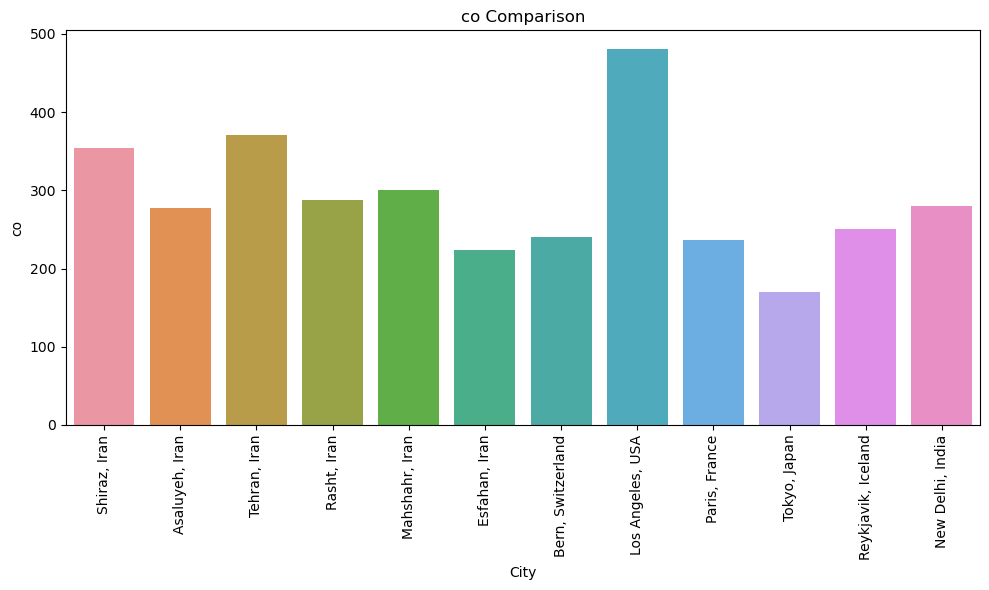

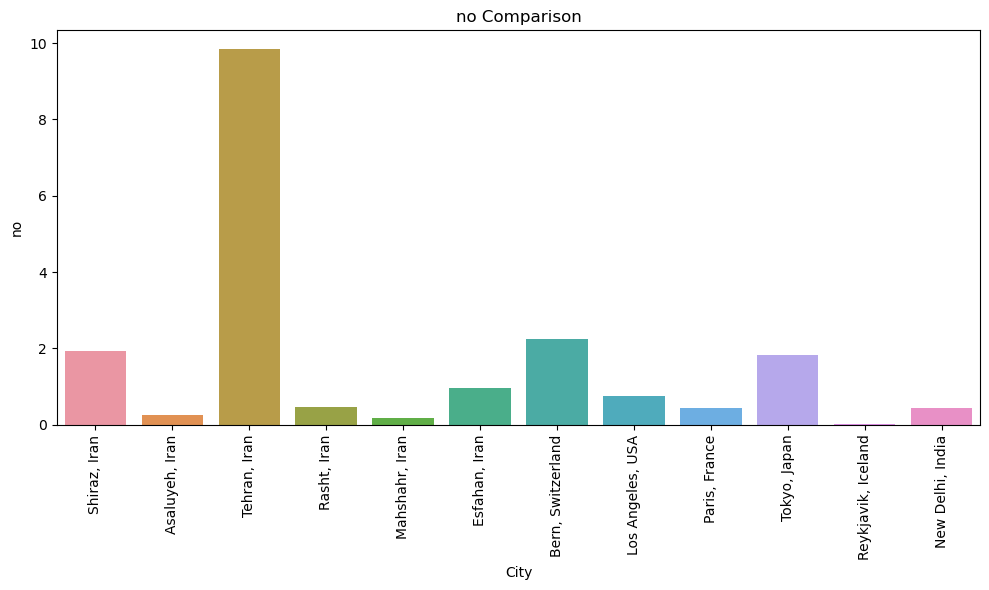

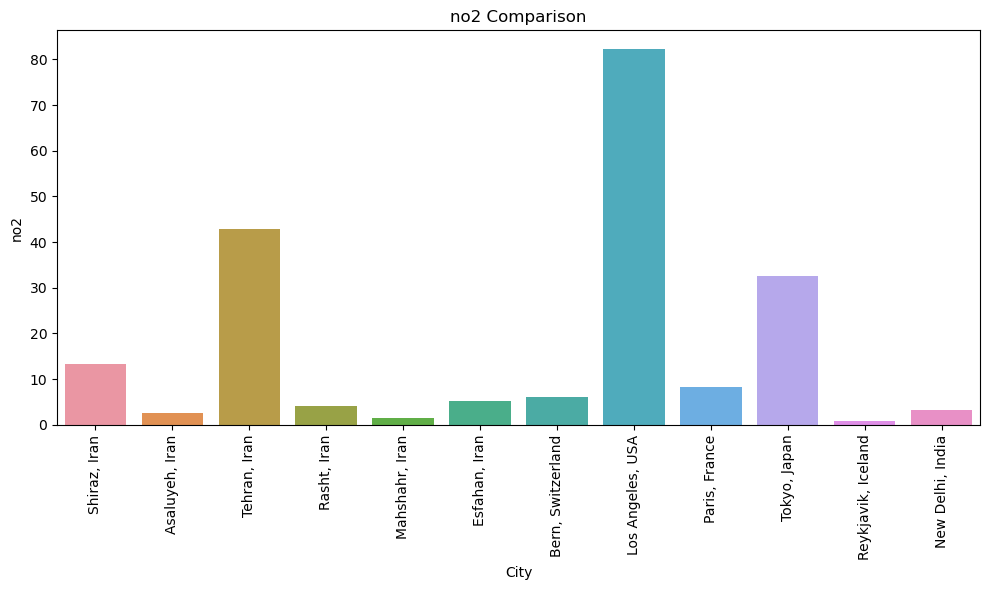

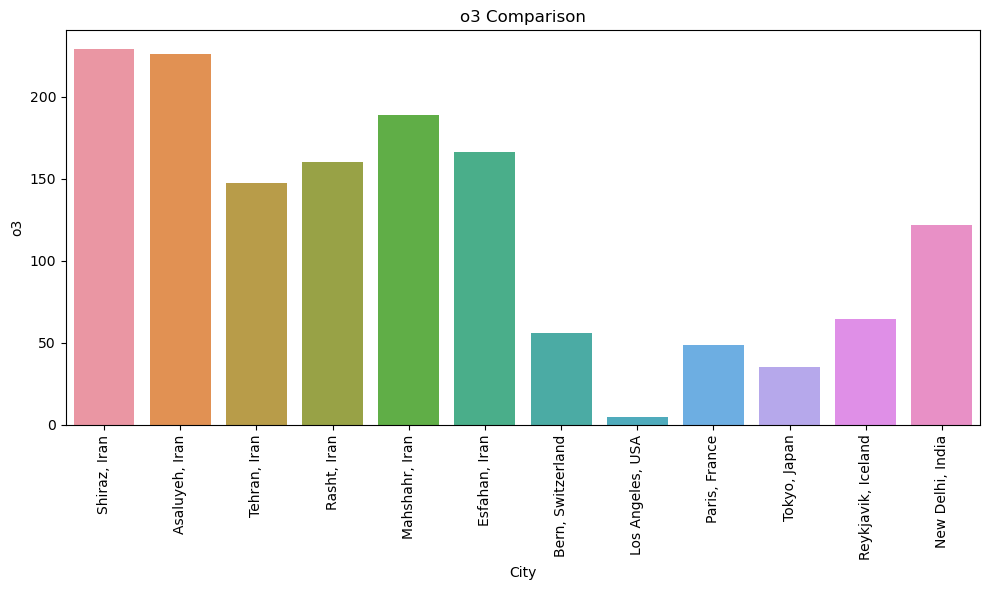

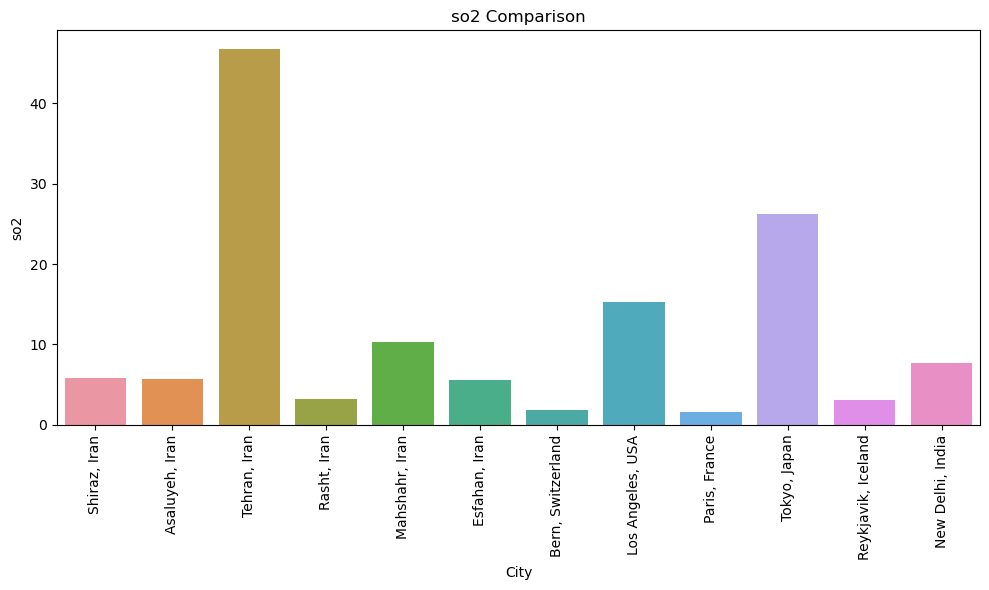

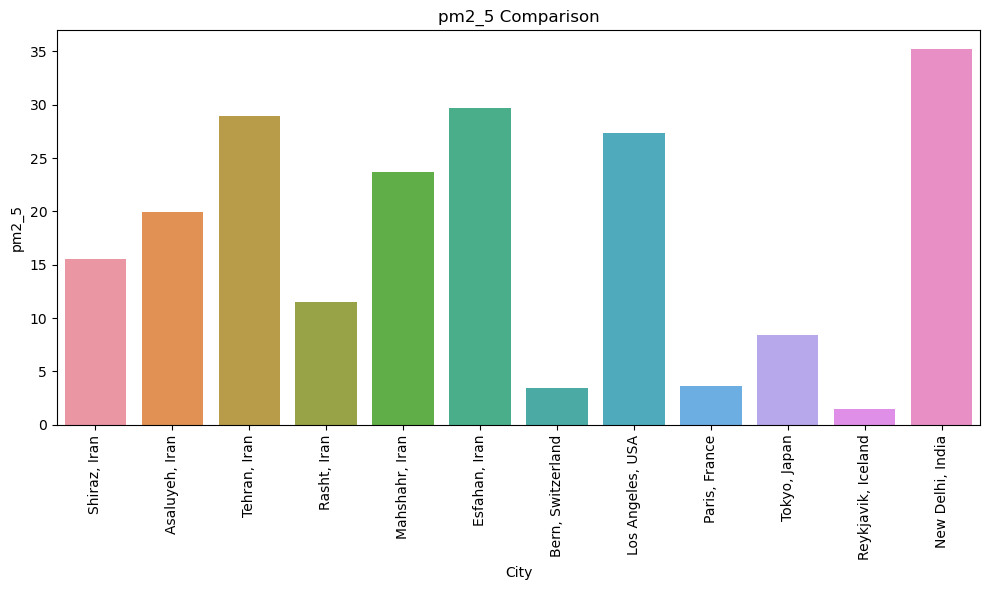

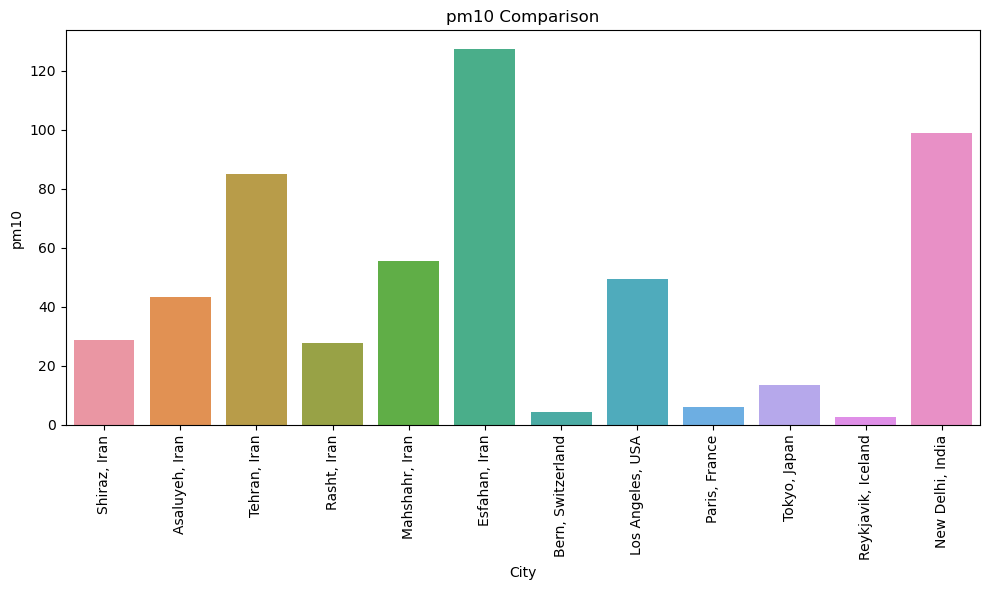

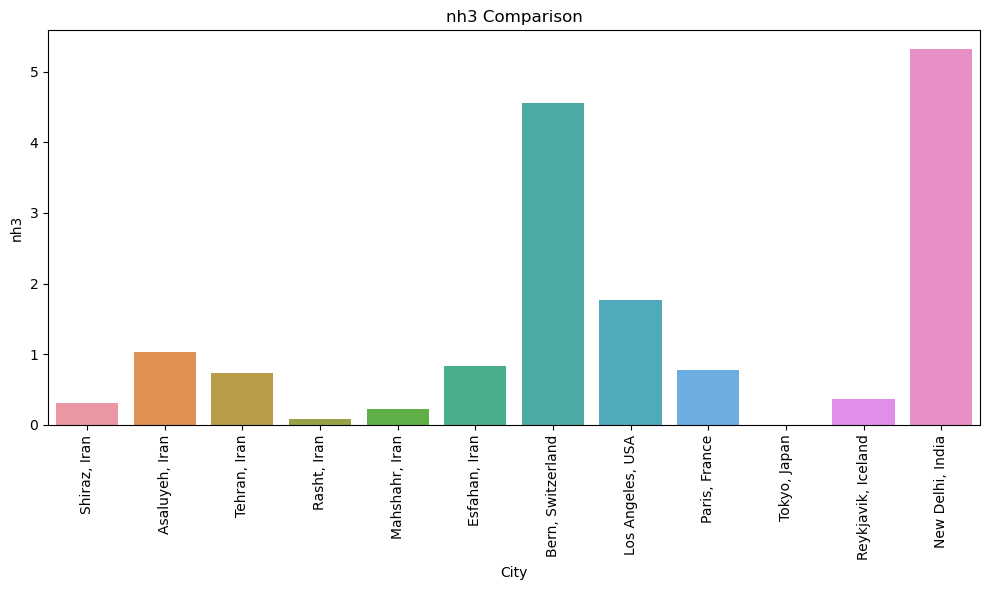

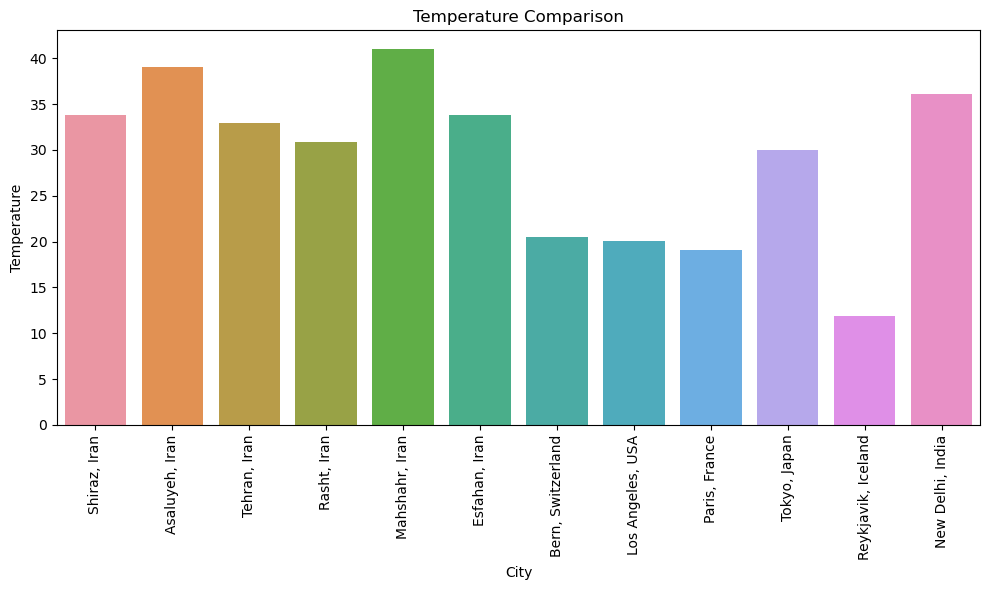

In [48]:
# Loop through each column and create a separate plot
for column in df.columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

    # Use Seaborn's barplot for better styling and features
    sns.barplot(data=df, x=df.index, y=column)
    
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.xlabel('City')
    plt.ylabel(column)
    plt.title(f'{column} Comparison')
    plt.tight_layout()

    plt.show()
